In this dataset, the same participants answered questions in 2012 and again 2014.

1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.
2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.
3. Who reported watching more TV in 2012, men or women?
4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?
5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?
6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')

In [3]:
data.shape

(8594, 13)

In [4]:
data.describe()

,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
count,8.594000e+03,8594.000000,8586.000000,8580.000000,8555.000000,8569.000000,8563.000000,8579.000000,8500.000000,8584.000000,8355.000000,8577.000000
mean,3.954938e+04,6.500000,3.861985,5.559907,6.005143,5.319874,7.694616,5.192563,2.748941,1.497204,47.470736,1.384867
std,6.267259e+05,0.500029,2.019689,2.233700,2.129866,2.173449,1.735904,1.457643,0.905477,0.500021,18.397369,0.486592
min,1.000000e+00,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,1.000000
25%,1.052000e+03,6.000000,2.000000,4.000000,5.000000,4.000000,7.000000,4.000000,2.000000,1.000000,33.000000,1.000000
50%,1.714000e+03,6.500000,4.000000,6.000000,6.000000,5.000000,8.000000,6.000000,3.000000,1.000000,47.000000,1.000000
75%,2.745000e+03,7.000000,5.000000,7.000000,8.000000,7.000000,9.000000,6.000000,3.000000,2.000000,62.000000,2.000000
max,1.100143e+07,7.000000,7.000000,10.000000,10.000000,10.000000,10.000000,7.000000,5.000000,2.000000,114.000000,2.000000


In [5]:
#Before I go any further I want to check in there are any null values in my dataset
print(data.isnull().sum())

cntry        0
idno         0
year         0
tvtot        8
ppltrst     14
pplfair     39
pplhlp      25
happy       31
sclmeet     15
sclact      94
gndr        10
agea       239
partner     17
dtype: int64


In [6]:
np.unique(data['cntry'])

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

In [7]:
for each in np.unique(data['cntry']):
    print("subject {}".format(each))
    print("{}%".format(round((len(data[data['cntry']==each])/len(data))*100)))

subject CH
18%
subject CZ
15%
subject DE
0%
subject ES
28%
subject NO
17%
subject SE
21%


In [8]:
data = data[data.cntry != 'DE']

In [9]:
np.unique(data['cntry'])

array(['CH', 'CZ', 'ES', 'NO', 'SE'], dtype=object)

In [10]:
data_2012 = data[data['year'] == 6]
data_2014 = data[data['year'] == 7]

In [11]:
print(data_2012.shape)
print(data_2014.shape)

(4283, 13)
(4283, 13)


In [12]:
data_2014 = data_2014.dropna()
data_2012 = data_2012.dropna()

### Question 1: Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

Text(0.07,0.5,'Trust Level')

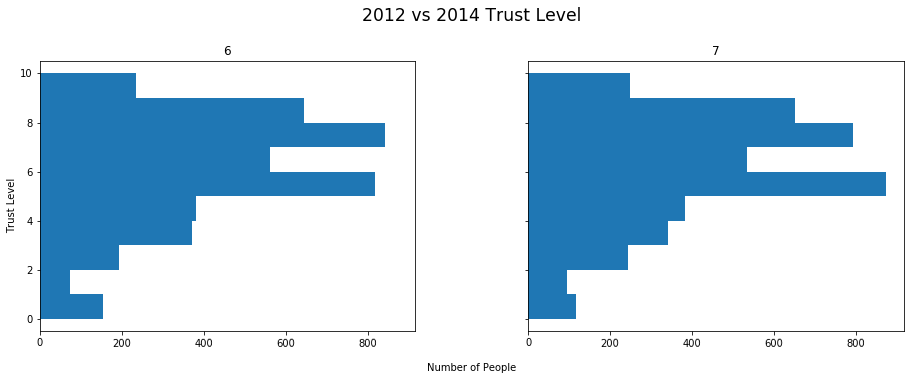

In [13]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data.hist(by='year', column='ppltrst', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle('2012 vs 2014 Trust Level', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Trust Level', va='center', rotation='vertical')

In [15]:
from scipy.stats import kstest
# This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). 
# Under the null hypothesis the two distributions are identical
print(kstest(data_2012['ppltrst'], 'norm'))
print(kstest(data_2014['ppltrst'], 'norm'))

KstestResult(statistic=0.9262395181257488, pvalue=0.0)
KstestResult(statistic=0.928751591340841, pvalue=0.0)


Because of the low p_value with the KS tests, this means that I reject the null hypothesis that the distribution of these values is identical to a normal distribution. Because of these finding, I will use a non-parametric test to answer this question. 

In [16]:
stats.mannwhitneyu(data_2012['ppltrst'],data_2014['ppltrst'])

MannwhitneyuResult(statistic=8202476.5, pvalue=0.3532815950282649)

In [17]:
for each in np.unique(data['cntry']):
    print(each)
    print(stats.mannwhitneyu(data_2012[data_2012['cntry']==each]['ppltrst'],
                          data_2014[data_2014['cntry']==each]['ppltrst']))

CH
MannwhitneyuResult(statistic=267361.0, pvalue=0.28548480842716395)
CZ
MannwhitneyuResult(statistic=182068.0, pvalue=0.49770792998106145)
ES
MannwhitneyuResult(statistic=617480.0, pvalue=0.006194821052719307)
NO
MannwhitneyuResult(statistic=248611.0, pvalue=0.3246607781543741)
SE
MannwhitneyuResult(statistic=350787.5, pvalue=0.017080947275388083)


Text(0.07,0.5,'Trust Level')

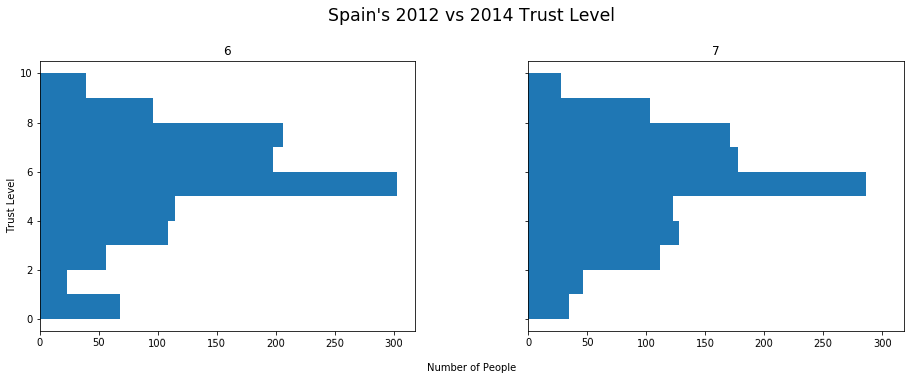

In [18]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data[data['cntry']=='ES'].hist(by='year', column='ppltrst', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle("Spain's 2012 vs 2014 Trust Level", x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Trust Level', va='center', rotation='vertical')

Text(0.07,0.5,'Trust Level')

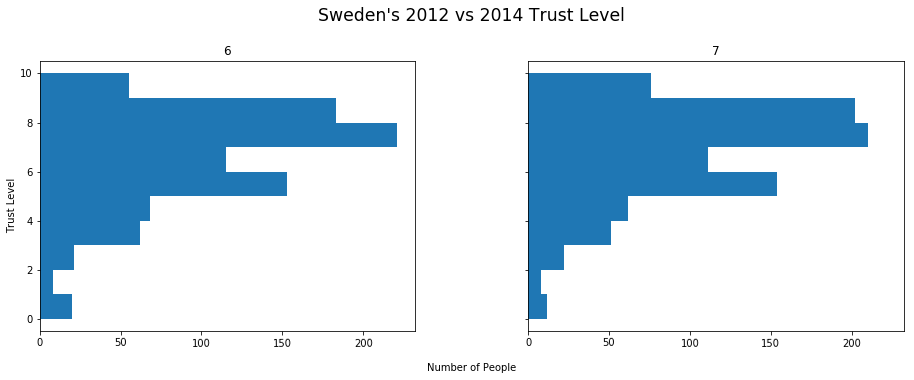

In [19]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data[data['cntry']=='SE'].hist(by='year', column='ppltrst', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle("Sweden's 2012 vs 2014 Trust Level", x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Trust Level', va='center', rotation='vertical')

For this question I first compared the overall trust level between 2012 and 2014. I then used the KS test and determined that both of these data samples were not normally distributed. The t-test from the Mann Whitney U test return a p_value of 0.35 which is not small enough to suggest a significant change between these time periods. Next I compared each country's trust level between 2012 and 2014 and only two countries, Spain and Sweden, had a meaningful p_value of less than 0.05. I then graphed Spain and Sweden's trust levels for each of those years. So to answer the question, no I don't see that overall people became less trusting between 2012 and 2014. However, there does appear to be some meaningful change in trust level for a few countries.

### Question 2: Did people become happier from 2012 to 2014? Compute results for each country in the sample.

Text(0.07,0.5,'Happiness')

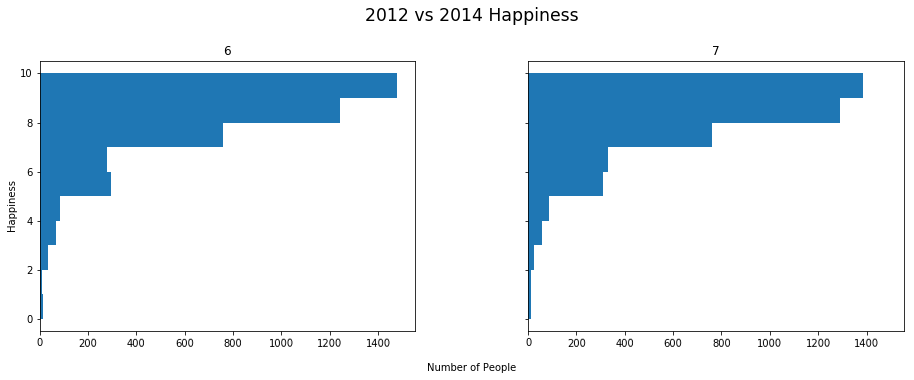

In [20]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data.hist(by='year', column='happy', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle('2012 vs 2014 Happiness', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Happiness', va='center', rotation='vertical')

In [21]:
# This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). 
# Under the null hypothesis the two distributions are identical
print(kstest(data_2012['happy'], 'norm'))
print(kstest(data_2014['happy'], 'norm'))

KstestResult(statistic=0.9846037737278573, pvalue=0.0)
KstestResult(statistic=0.9885565519929883, pvalue=0.0)


Like the previous quesion, the low p_value with the KS tests  means that I reject the null hypothesis that the distribution of these values is identical to a normal distribution. Because of these finding, I will use a non-parametric test to answer this question.

In [22]:
stats.mannwhitneyu(data_2012['happy'],data_2014['happy'])

MannwhitneyuResult(statistic=8037553.0, pvalue=0.024000896136280533)

In [23]:
stats.kruskal(data_2012['happy'],data_2014['happy'])

KruskalResult(statistic=3.909942293862934, pvalue=0.0480012454923282)

In [24]:
for each in np.unique(data['cntry']):
    print(each)
    print(stats.mannwhitneyu(data_2012[data_2012['cntry']==each]['happy'],
                          data_2014[data_2014['cntry']==each]['happy']))

CH
MannwhitneyuResult(statistic=265131.5, pvalue=0.19495027197081582)
CZ
MannwhitneyuResult(statistic=176796.0, pvalue=0.18724347670459124)
ES
MannwhitneyuResult(statistic=629830.0, pvalue=0.04263522765394516)
NO
MannwhitneyuResult(statistic=220453.5, pvalue=1.2346345897635287e-05)
SE
MannwhitneyuResult(statistic=369192.0, pvalue=0.37586498218551584)


Text(0.07,0.5,'Happiness')

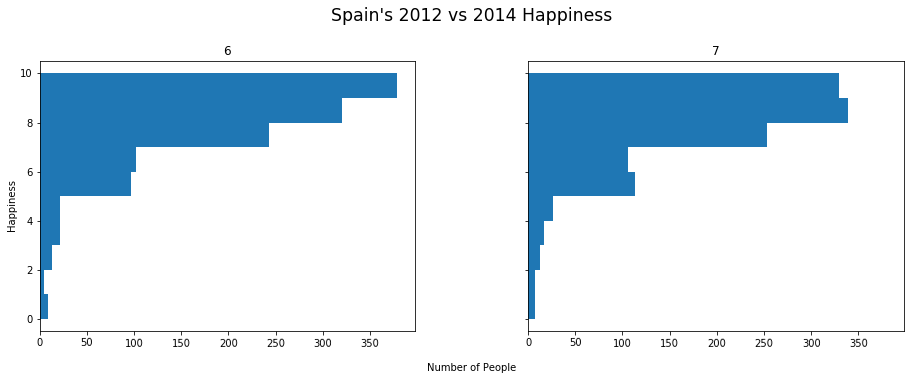

In [25]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data[data['cntry']=='ES'].hist(by='year', column='happy', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle("Spain's 2012 vs 2014 Happiness", x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Happiness', va='center', rotation='vertical')

Text(0.07,0.5,'Happiness')

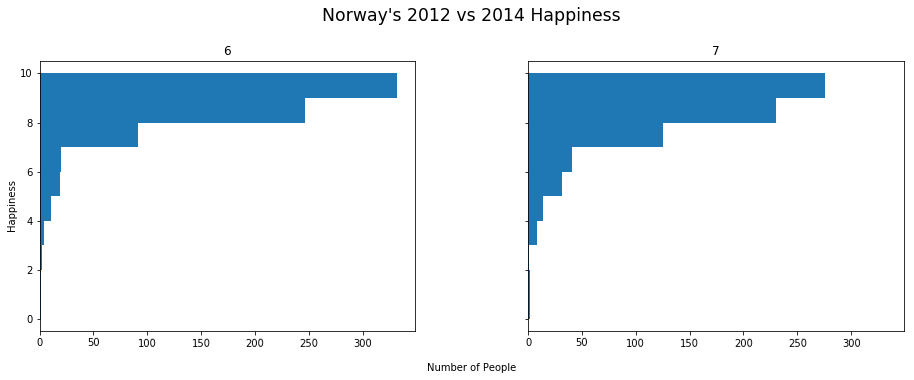

In [26]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data[data['cntry']=='NO'].hist(by='year', column='happy', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle("Norway's 2012 vs 2014 Happiness", x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Happiness', va='center', rotation='vertical')

For this question, I used Non-Parametric tests. I used both a Mann-Whitney U and a Kruskal-Wallis Test and they both had a low p_value that showed a significant difference between 2012 and 2014 reported happiness level. From the appear of the first graph, it looks like the level of happiness decreased from 2012 to 2014. When I use the same test for each country, it appeared that  Spain and Norway showed a meaningful change in reported happiness level. 

### Question 3: Who reported watching more TV in 2012, men or women?

Text(0.07,0.5,'TV Hours')

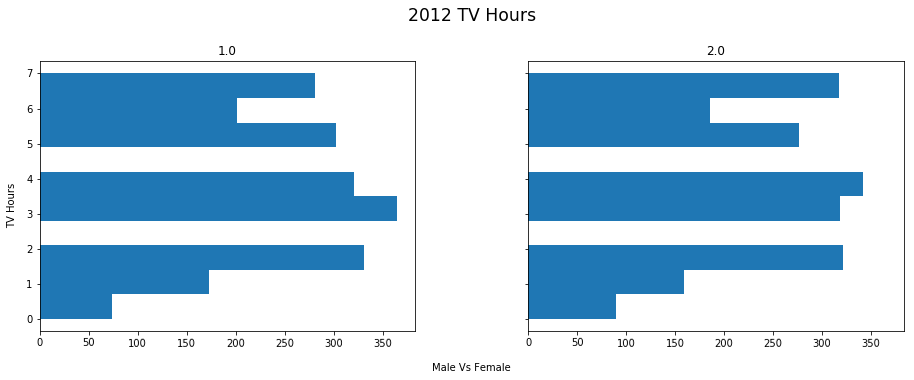

In [27]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data_2012.hist(by='gndr', column='tvtot', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle('2012 TV Hours', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Male Vs Female', ha='center')
fig.text(0.07, 0.5, 'TV Hours', va='center', rotation='vertical')

In [28]:
male_2012 = data_2012[data_2012['gndr'] == 1.0]
female_2012 = data_2012[data_2012['gndr'] == 2.0]

In [29]:
# This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). 
# Under the null hypothesis the two distributions are identical
print(kstest(male_2012['tvtot'], 'norm'))
print(kstest(female_2012['tvtot'], 'norm'))

KstestResult(statistic=0.8566443993018208, pvalue=0.0)
KstestResult(statistic=0.8533692710368954, pvalue=0.0)


Again, the low p_value with the KS tests  means that I reject the null hypothesis that the distribution of these values is identical to a normal distribution. Because of these finding, I will use a non-parametric test to answer this question.

In [31]:
stats.mannwhitneyu(male_2012['tvtot'],female_2012['tvtot'])

MannwhitneyuResult(statistic=2029380.5, pvalue=0.21722855760502108)

Because the p_value is greater than 0.05, that suggests to me that there was no significant difference between men and women's reported time watching TV in 2012. 

### Question 4: Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

Text(0.07,0.5,'People Fair')

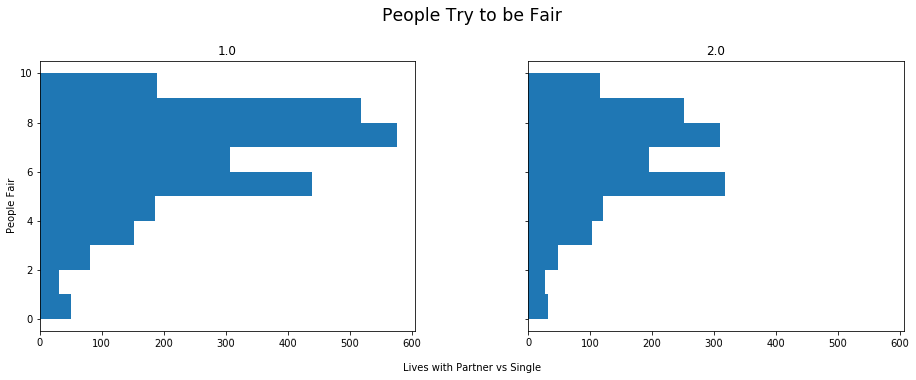

In [32]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data_2012.hist(by='partner', column='pplfair', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle('People Try to be Fair', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Lives with Partner vs Single', ha='center')
fig.text(0.07, 0.5, 'People Fair', va='center', rotation='vertical')

In [33]:
partner_2012 = data_2012[data_2012['partner'] == 1.0]
single_2012 = data_2012[data_2012['partner'] == 2.0]

In [34]:
print(partner_2012.shape)
print(single_2012.shape)

(2534, 13)
(1524, 13)


In [35]:
# This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). 
# Under the null hypothesis the two distributions are identical
print(kstest(partner_2012['pplfair'], 'norm'))
print(kstest(single_2012['pplfair'], 'norm'))

KstestResult(statistic=0.9448899627637387, pvalue=0.0)
KstestResult(statistic=0.9378797893116633, pvalue=0.0)


Because of the low p_value with the KS tests I'm rejecting the null hypothesis that the distribution of these values is identical to a normal distribution. Because of these finding, I will use a non-parametric test to answer this question.

In [36]:
stats.mannwhitneyu(partner_2012['pplfair'],single_2012['pplfair'])

MannwhitneyuResult(statistic=1811684.5, pvalue=0.0004137437848867606)

For this questions, it does appear that in 2012 there was a statistically significant difference between the people living with a partner and people living alone and their belief in people being fair. The p_value is noticeably low at 0.001. So to answer the question, people who live with a partner were more likely to believe that people are fair in 2012. 

### Question 5: Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Text(0.07,0.5,'Socialize')

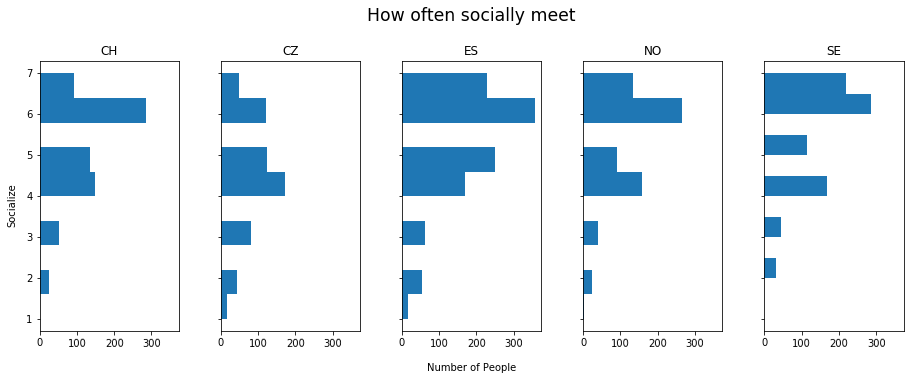

In [37]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data_2014.hist(by='cntry', column='sclmeet', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle('How often socially meet', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Socialize', va='center', rotation='vertical')

In [38]:
# This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). 
# Under the null hypothesis the two distributions are identical
for each in np.unique(data['cntry']):
    print(kstest(data_2014[data_2014['cntry']==each]['sclmeet'], 'norm'))

KstestResult(statistic=0.9745580780114439, pvalue=0.0)
KstestResult(statistic=0.9508472277877944, pvalue=0.0)
KstestResult(statistic=0.96314052060914, pvalue=0.0)
KstestResult(statistic=0.9744408792877759, pvalue=0.0)
KstestResult(statistic=0.9772498680518208, pvalue=0.0)


Because of the low p_value with the KS tests I'm rejecting the null hypothesis that any of these distributions is identical to a normal distribution. Because of this finding, I will use a non-parametric test to answer this question.

In [39]:
stat, p, med, tbl = stats.median_test(data_2014[data_2014['cntry']=='CH']['sclmeet'], 
                                      data_2014[data_2014['cntry']=='CZ']['sclmeet'], 
                                      data_2014[data_2014['cntry']=='ES']['sclmeet'],
                                      data_2014[data_2014['cntry']=='NO']['sclmeet'],
                                      data_2014[data_2014['cntry']=='SE']['sclmeet'],
                                      nan_policy='omit')

In [40]:
p

6.575335590078349e-19

In [41]:
social_list = np.asarray(data_2014[data_2014['cntry']=='CH']['sclmeet'].tolist() + 
                         data_2014[data_2014['cntry']=='CZ']['sclmeet'].tolist() + 
                         data_2014[data_2014['cntry']=='ES']['sclmeet'].tolist() +
                         data_2014[data_2014['cntry']=='NO']['sclmeet'].tolist() +
                         data_2014[data_2014['cntry']=='SE']['sclmeet'].tolist())

In [42]:
countries = []
for each in np.unique(data['cntry']):
    countries.append([each]*len(data_2014[data_2014['cntry']==each]['sclmeet']))

countries = [y for x in countries for y in x]

In [43]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=social_list,  # Data
                          groups=countries,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary() 

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.6799,-0.8873,-0.4725,True
CH,ES,0.0887,-0.0901,0.2675,False
CH,NO,0.1354,-0.0633,0.3341,False
CH,SE,0.2599,0.0704,0.4493,True
CZ,ES,0.7686,0.578,0.9593,True
CZ,NO,0.8153,0.6059,1.0248,True
CZ,SE,0.9398,0.7392,1.1404,True
ES,NO,0.0467,-0.1344,0.2279,False
ES,SE,0.1712,0.0002,0.3421,True
NO,SE,0.1244,-0.0672,0.3161,False


To answer this question I first graphed the 2014 reported levels of socialization by each of the countries. Visually, there does appear to be a noticeable difference between the Czech Republic and the other countries. I used a non-parametric test on the data because the KS test showed that the data was not normally distributed. The p_value was very low at 6.575335590078349e-19 which suggests that there is a significant difference in the reported level of socializing between countries. I then used the MultiComparison Pairwaise TukeyHSD to see the difference between countries. The countries that stands out is are the Czech Republic and Sweden. With the Czech Republic the null hypothesis could be reject when comparing it to every other country in the list while Sweden's could be rejected three out of hour times. 

### Question 6: Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Text(0.07,0.5,'Socialize')

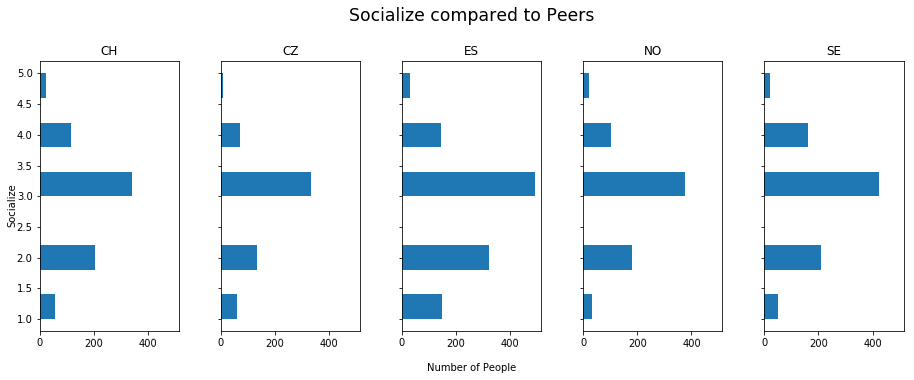

In [44]:
# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=5, sharex=True, sharey=True, figsize=(15,5))

# drop sharex, sharey, layout & add ax=axes
data_2014.hist(by='cntry', column='sclact', ax=axes, xrot=1, orientation='horizontal')

# set title and axis labels
plt.suptitle('Socialize compared to Peers', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.04, 'Number of People', ha='center')
fig.text(0.07, 0.5, 'Socialize', va='center', rotation='vertical')

In [45]:
# This performs a test of the distribution G(x) of an observed random variable against a given distribution F(x). 
# Under the null hypothesis the two distributions are identical
for each in np.unique(data['cntry']):
    print(kstest(data_2014[data_2014['cntry']==each]['sclact'], 'norm'))

KstestResult(statistic=0.8991879568808921, pvalue=0.0)
KstestResult(statistic=0.8798901320782234, pvalue=0.0)
KstestResult(statistic=0.8458565699918561, pvalue=0.0)
KstestResult(statistic=0.9323060478271017, pvalue=0.0)
KstestResult(statistic=0.9207331437150272, pvalue=0.0)


Because of the low p_value with the KS tests I'm rejecting the null hypothesis that any of these distributions is identical to a normal distribution. Because of this finding, I will use a non-parametric test to answer this question.

In [47]:
stat, p, med, tbl = stats.median_test(data_2014[data_2014['cntry']=='CH']['sclact'], 
                                      data_2014[data_2014['cntry']=='CZ']['sclact'], 
                                      data_2014[data_2014['cntry']=='ES']['sclact'],
                                      data_2014[data_2014['cntry']=='NO']['sclact'],
                                      data_2014[data_2014['cntry']=='SE']['sclact'])

In [48]:
p

0.0003601241248338286

In [49]:
social_peer = np.asarray(data_2014[data_2014['cntry']=='CH']['sclact'].tolist() + 
                         data_2014[data_2014['cntry']=='CZ']['sclact'].tolist() + 
                         data_2014[data_2014['cntry']=='ES']['sclact'].tolist() +
                         data_2014[data_2014['cntry']=='NO']['sclact'].tolist() +
                         data_2014[data_2014['cntry']=='SE']['sclact'].tolist())

In [50]:
countries = []
for each in np.unique(data['cntry']):
    countries.append([each]*len(data_2014[data_2014['cntry']==each]['sclact']))

countries = [y for x in countries for y in x]

In [51]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
tukey = pairwise_tukeyhsd(endog=social_peer,  # Data
                          groups=countries,   # Groups
                          alpha=0.05)         # Significance level

tukey.summary()

group1,group2,meandiff,lower,upper,reject
CH,CZ,-0.0553,-0.1876,0.0771,False
CH,ES,-0.1533,-0.2674,-0.0391,True
CH,NO,0.0763,-0.0505,0.2031,False
CH,SE,0.0942,-0.0266,0.2151,False
CZ,ES,-0.098,-0.2196,0.0237,False
CZ,NO,0.1316,-0.002,0.2652,False
CZ,SE,0.1495,0.0215,0.2775,True
ES,NO,0.2296,0.114,0.3452,True
ES,SE,0.2475,0.1384,0.3566,True
NO,SE,0.0179,-0.1043,0.1402,False


To answer this question I began by graphing the 2014 responses for people take part in social activities compared to peers the same age. From the histogram it does appear that Spain and Sweden have more and higher numbers than the Czech Republic and Switzerland. The data does appear to be normally distributed so I used a parametric method to see if there is any difference is compared socializing between countries and yes, the p_value of 4.5950869900689776e-10 suggests that there is a meaningful difference. I then used the MultiComparison Pairwaise TukeyHSD to see the difference between countries. The country that stands out is Spain and its higher reports of socializing about the same as peers. I concluded this because the null hypothesis could be reject three out of four times when comparing it to every other countries in the list.